In [181]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from prettytable import PrettyTable
import matplotlib.gridspec as gridspeс
import json
import math
import numpy as np
import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import display as idisplay
from scipy.optimize import curve_fit
import scipy
plt.rcParams["font.family"] = "Times New Roman"

In [121]:
orders = pd.read_csv(r'E:\Downloads\orders_corrected.csv') #Потому что json не читался ни в sql, ни в python
sales = pd.read_csv(r'E:\Downloads\sales.csv')
user = pd.read_csv(r'E:\Downloads\user.csv')
store = pd.read_csv(r'E:\Downloads\store.csv')
product = pd.read_csv(r'E:\Downloads\product.csv')


### Датафреймы

In [22]:
product

,product_id,product_name,product_size,product_color
0,1,Azure Bliss Jeans,XS,Red
1,2,Azure Bliss Jeans,XS,Blue
2,3,Azure Bliss Jeans,XS,Green
3,4,Azure Bliss Jeans,XS,Yellow
4,5,Azure Bliss Jeans,XS,Purple
...,...,...,...,...
3715,3716,Onyx Odyssey Onesie,XXL,Orange
3716,3717,Onyx Odyssey Onesie,XXL,Pink
3717,3718,Onyx Odyssey Onesie,XXL,Brown
3718,3719,Onyx Odyssey Onesie,XXL,Black


In [137]:
store

,store_id,longtitude,latitude,store_name,store_open_date,store_close_date
0,1,55.790491,37.531373,Aviapark,2023-01-15,NaN
1,2,55.748963,37.539035,Afimoll,2022-10-11,2023-10-26
2,3,55.744263,37.565527,Evropeisky,2023-04-01,NaN
3,4,55.692065,37.527865,Kapitoliy Vernadskogo,2023-09-14,NaN
4,5,55.641048,37.530496,Kapitoly Belyaevo,2022-04-07,2023-03-27
5,6,55.663782,37.511308,Rio Leninsky,2022-01-10,NaN
6,7,55.771158,37.620650,Tsvetnoy,2023-06-21,2023-11-21
7,8,56.829106,60.599493,Grinvich,2023-08-05,NaN
8,9,59.927848,30.360482,Galereia,2023-05-01,NaN
9,10,59.987513,30.353777,Evropolis,2022-05-18,NaN


In [136]:
user

,user_id,user_name,user_registration_address,user_phone,user_email,user_birthdate,status
0,1,Онуфрий Жаринов,"Лыткарино, Аллея Старонародная 148",+7-***-430-6958,lap1987@yandex.ru,1984-12-01,accepted
1,2,Лола Новгородцева,"Тольятти, ул. Головин Б. 830",+7-***-356-7568,rewards1859@mail.ru,1959-03-22,accepted
2,3,Фаина Чернева,"Калининск, Аллея Третьего Интернационала 98",+7-***-431-9125,optimize2027@yahoo.com,1984-08-28,accepted
3,4,Серафим Берестов,"Павлово, Аллея Радиаторская 2-я 1022",+7-***-695-6230,furthermore1938@outlook.com,1987-10-17,accepted
4,5,Азиза Мухина,"Навашино, Аллея Сусоколовское 1330",+7-***-000-6631,major1915@mail.com,1963-08-04,accepted
...,...,...,...,...,...,...,...
9995,9996,Влада Синявская,"Гороховец, ул. Магазинная 129",+7-***-112-1940,websites2065@protonmail.com,1952-05-31,registered
9996,9997,Василиса Перфильева,"Одинцово, Аллея Карельская 788",+7-***-142-6528,terror1838@yandex.ru,1970-03-27,deleted
9997,9998,Иуда Берсенев,"Крымск, ул. Новоселки 2-я 536",+7-***-703-2171,occupation1856@outlook.com,1964-11-15,registered
9998,9999,Амира Белоусова,"Мантурово, ул. Медвежая 127",+7-***-415-4063,distribution1828@gmail.com,1977-05-11,accepted


In [107]:
orders

,order_id,order_date,user_id,store_id,product_info
0,1,2022-01-11,13,6,"[{""product_id"": 3283, ""product_price"": 18245.9..."
1,2,2022-01-11,70,6,"[{""product_id"": 505, ""product_price"": 11060.84..."
2,3,2022-01-11,75,6,"[{""product_id"": 1546, ""product_price"": 3065.23..."
3,4,2022-01-11,172,6,"[{""product_id"": 3354, ""product_price"": 7131.35..."
4,5,2022-01-11,176,6,"[{""product_id"": 3595, ""product_price"": 13762.1..."
...,...,...,...,...,...
1009995,1009996,2023-11-30,9966,15,"[{""product_id"": 138, ""product_price"": 9948.590..."
1009996,1009997,2023-11-30,9978,15,"[{""product_id"": 1389, ""product_price"": 8984.21..."
1009997,1009998,2023-11-30,9979,15,"[{""product_id"": 2341, ""product_price"": 18336.8..."
1009998,1009999,2023-11-30,9984,15,"[{""product_id"": 710, ""product_price"": 9029.154..."


In [106]:
sales

,id,purchase_date,order_id,product_id,is_canceled,is_accepted,is_bought
0,1,2022-01-11,1,3283,False,True,1
1,2,2022-01-14,1,1068,False,True,1
2,3,2022-01-13,2,505,False,True,1
3,4,2022-01-13,2,1351,False,True,1
4,5,2022-01-16,2,94,False,True,1
...,...,...,...,...,...,...,...
3373084,3373085,2023-12-07,1009998,1327,True,True,0
3373085,3373086,2023-12-07,1009998,3331,True,True,0
3373086,3373087,2023-12-05,1009999,710,True,True,0
3373087,3373088,2023-12-05,1009999,1638,True,True,0


### Задание 3.1

### Общая статистика 

In [8]:
sales['is_bought'] = sales['is_accepted'].astype(int) - sales['is_canceled'].astype(int)
s = sales.groupby('order_id')['is_bought'].apply(lambda x: (x==1).sum()).reset_index(name='bought_goods_num')
merged = pd.merge(pd.merge(orders, s, on='order_id'), sales.groupby('order_id').count()['id'],on='order_id')


In [168]:
x = PrettyTable()
x.field_names = ["Общее количество заказов", 
                 "Количество полностью выкупленных заказов",
                 "Процент выкупа заказов", 
                 "Количество продаж", "Аудитория", 
                 "Количество магазинов"]
order_num = len(orders)
order_fully_bought_num = len(merged[merged['bought_goods_num'] == merged['id']])
sales_num = len(sales[(sales['is_accepted'] == True ) & (sales['is_canceled'] == False )])
audience_num = len(user[user['status'] != 'deleted'])
stores_num = len(store[store['store_close_date'].isna() == True])
x.add_row([order_num, order_fully_bought_num, f'{order_fully_bought_num / order_num * 100} %', sales_num, audience_num, stores_num])
x.title = "Общая статистика"
x

Общее количество заказов,Количество полностью выкупленных заказов,Процент выкупа заказов,Количество продаж,Аудитория,Количество магазинов
1010000,561316,55.57584158415841 %,1411786,8726,11


### Сводка по аудитории сети

In [5]:
user['user_birthdate'] = pd.to_datetime(user['user_birthdate'])
user['sex'] = user['user_name'].apply(lambda x: 'male' if x[-1] != 'а' else 'female')
user['age'] = user["user_birthdate"].apply(lambda x : (2024 - x.year))

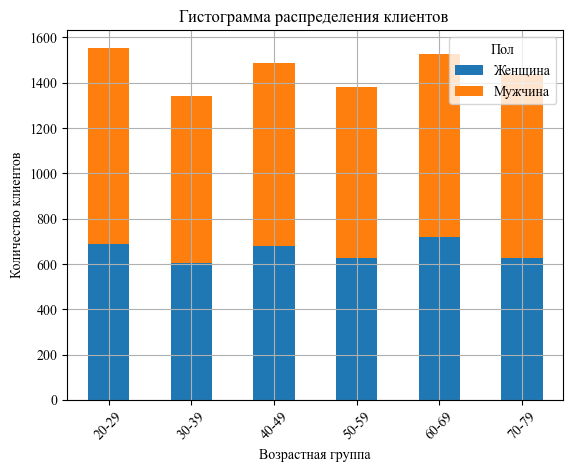

In [357]:
warnings.simplefilter(action='ignore', category=FutureWarning)
user['age_group'] = pd.cut(user['age'], bins=6)
grouped = user[user['status'] != 'deleted'].groupby('age_group')['sex'].value_counts(normalize=False).unstack()

fig, ax = plt.subplots()
grouped.plot(kind='bar', stacked=True, ax=ax)
plt.legend(title='Пол',labels=['Женщина', 'Мужчина'])
ax.set_xlabel('Возрастная группа')
ax.set_ylabel('Количество клиентов')
ax.set_title('Гистограмма распределения клиентов ')
ax.set_xticklabels(age_groups, rotation=45)
plt.grid()
plt.show()

### Статистика по количеству продаж

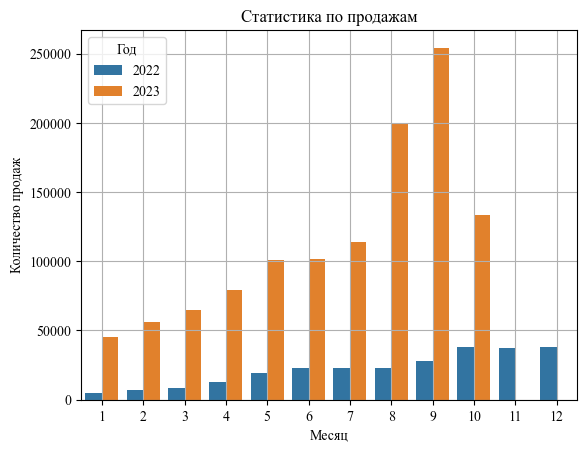

In [351]:
sales['purchase_date'] = pd.to_datetime(sales['purchase_date'])
sales['month_of_sale'] = sales['purchase_date'].apply(lambda x : x.month)
sales['year_of_sale'] = sales['purchase_date'].apply(lambda x : x.year)
sales_data = sales[(sales['is_accepted'] == True ) & (sales['is_canceled'] == False )]
sales_2022 = sales[(sales['is_accepted'] == True ) & (sales['is_canceled'] == False ) & (sales['year_of_sale'] == 2022)].groupby('month_of_sale')['id'].count().reset_index().rename(columns={'id':'sales'})
sales_2023 = sales[(sales['is_accepted'] == True ) & (sales['is_canceled'] == False ) & (sales['year_of_sale'] == 2023)].groupby('month_of_sale')['id'].count().reset_index().rename(columns={'id':'sales'})
sales_info = sales_data.groupby(['month_of_sale','year_of_sale'])['id'].count().reset_index().rename(columns={'id':'sales'})
sales_info['year_of_sale'] = sales_info['year_of_sale'].astype(str)
sns.barplot(data=sales_info, x='month_of_sale', y='sales', hue='year_of_sale')
plt.xlabel('Месяц')
plt.ylabel('Количество продаж')
plt.legend(title='Год')
plt.title('Статистика по продажам г/г')
plt.grid()

### Статистика по выручке и прибыли

In [99]:
df_orders = pd.json_normalize(orders['product_info'].apply(json.loads).explode())
df_orders['order_id'] = orders['order_id'].repeat(orders['product_info'].apply(json.loads).str.len()).reset_index(drop=True)
df_orders['user_id'] = orders['user_id'].repeat(orders['product_info'].apply(json.loads).str.len()).reset_index(drop=True)
df_orders['store_id'] = orders['store_id'].repeat(orders['product_info'].apply(json.loads).str.len()).reset_index(drop=True)
df_orders['revenue'] = df_orders.apply(lambda row: row['product_comission'] if not row['comission_is_percent'] else row['product_price'] * row['product_comission'] / 100, axis=1)
df_orders = df_orders.reset_index(drop=True)
#Использую конкатенацию, так как merge выдавал дубликаты, которые не удалялись - времени на обнаружение ошибки не было, а таблицы уже отсортированы по order_id, так что на результат влияния быть не должно
sales_list = pd.concat([sales, df_orders.sort_values(by='order_id')], axis=1)
sales_list = sales_list.loc[:,~sales_list .columns.duplicated()].copy()
sales_list = sales_list[(sales_list['is_accepted'] == True ) & (sales_list['is_canceled'] == False )]
sales_list['purchase_date'] = pd.to_datetime(sales_list['purchase_date'])
sales_list['month_of_sale'] = sales_list['purchase_date'].apply(lambda x : x.month)
sales_list['year_of_sale'] = sales_list['purchase_date'].apply(lambda x : x.year)
sales_list_gr = sales_list.groupby(['month_of_sale','year_of_sale'])[['revenue','product_price']].sum().reset_index()

In [7]:
sales_list_gr = sales_list.groupby(['month_of_sale','year_of_sale'])[['revenue','product_price']].sum().reset_index()
sales_list_gr_2023 = sales_list_gr[sales_list_gr['year_of_sale'] == 2023]
sales_list_gr_2022 = sales_list_gr[sales_list_gr['year_of_sale'] == 2022]
sales_list_gr['year_of_sale'] = sales_list_gr['year_of_sale'].astype(str)
sales_list_gr['revenue_mil'] = sales_list_gr['revenue'].apply(lambda x: round(x/1e6,2))
sales_list_gr['product_price_mil'] = sales_list_gr['product_price'].apply(lambda x: round(x/1e6,2))

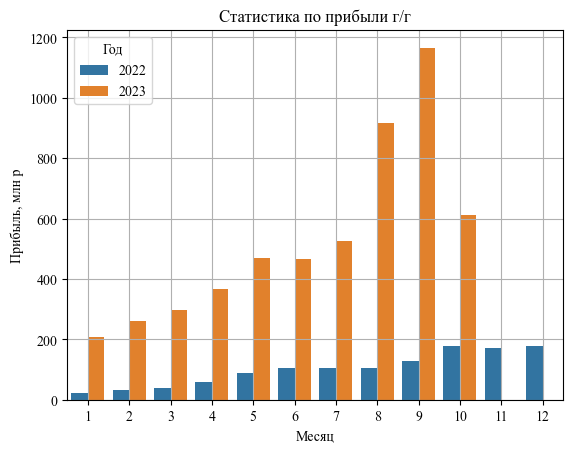

In [64]:
sns.barplot(data=sales_list_gr, x='month_of_sale', y='revenue_mil', hue='year_of_sale')
plt.xlabel('Месяц')
plt.ylabel('Прибыль, млн р')
plt.legend(title='Год')
plt.title('Статистика по прибыли г/г')
plt.grid()

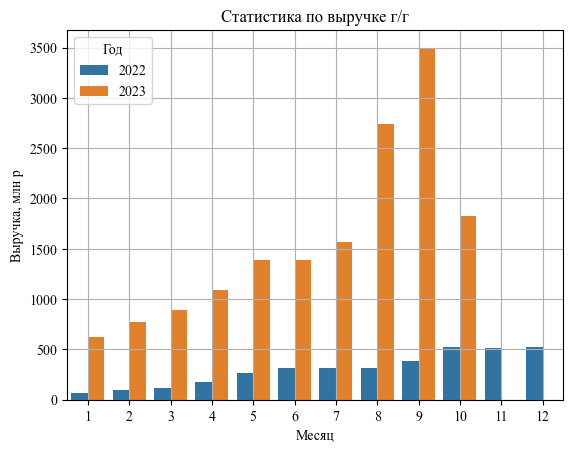

In [65]:
sns.barplot(data=sales_list_gr, x='month_of_sale', y='product_price_mil', hue='year_of_sale')
plt.xlabel('Месяц')
plt.ylabel('Выручка, млн р')
plt.legend(title='Год')
plt.title('Статистика по выручке г/г')
plt.grid()

### Соотношение выручки и комиссионной прибыли за 2022 и 2023

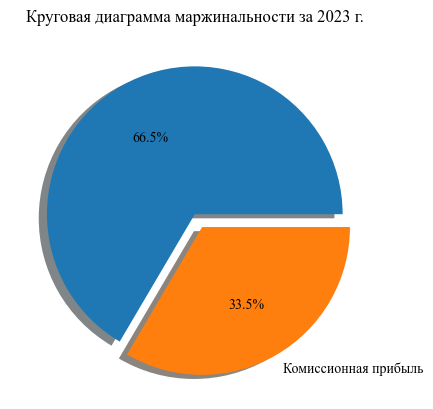

In [170]:
#Здесь учитываем, что выручка = все полученные деньги, а прибыль - часть от этих полученных денег, поэтому значения вычитаем
values = [sum(sales_list_gr_2023['product_price'])-sum(sales_list_gr_2023['revenue']), sum(sales_list_gr_2023['revenue'])]
labels = ['', 'Комиссионная прибыль']
explode = (0, 0.1)
plt.pie(values, labels=labels, autopct='%1.1f%%', explode=explode,shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9})
plt.title('Круговая диаграмма маржинальности за 2023 г.')
plt.show()

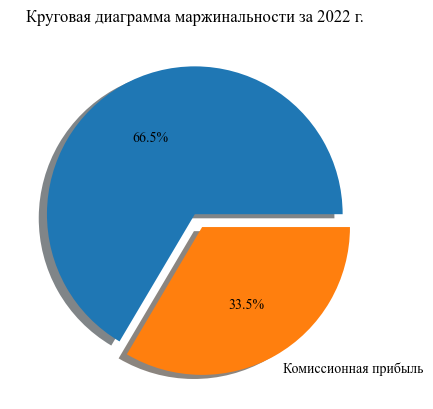

In [171]:
values = [sum(sales_list_gr_2022['product_price'])-sum(sales_list_gr_2022['revenue']), sum(sales_list_gr_2022['revenue'])]
labels = ['', 'Комиссионная прибыль']
explode = (0, 0.1)
plt.pie(values, labels=labels, autopct='%1.1f%%', explode=explode,shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9})
plt.title('Круговая диаграмма маржинальности за 2022 г.')
plt.show()

### Распределение аудитории по суммарному выкупу

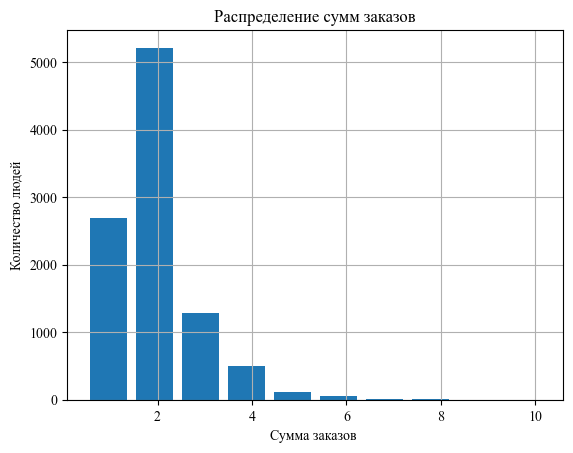

In [173]:
fig, ax = plt.subplots()
order_amounts = sales_list.groupby('user_id')['product_price'].sum().values / 1e6
ax.hist(order_amounts, bins=10, rwidth=0.8)
ax.set_xlabel('Сумма заказов ')
ax.set_ylabel('Количество людей')
ax.set_title('Распределение сумм заказов')
plt.grid()
plt.show()


### Корелляция возраста и пола с суммарной суммой покупок

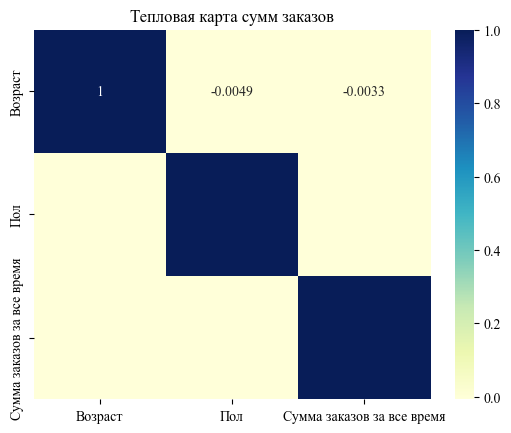

In [26]:
corr_df = sales_list.groupby('user_id')['product_price'].sum().reset_index()
corr_df = pd.merge(corr_df, user, on='user_id').rename(columns={'product_price':'orders_sum'})
corr_df['sex_b'] = corr_df['sex'].apply(lambda x: 1 if x == 'male' else 0)
corr = corr_df.rename(columns={'sex_b':'Пол','orders_sum':'Сумма заказов за все время', 'age':'Возраст'})[['Возраст','Пол','Сумма заказов за все время']].corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.title('Тепловая карта сумм заказов')
plt.show()

### Сезонность

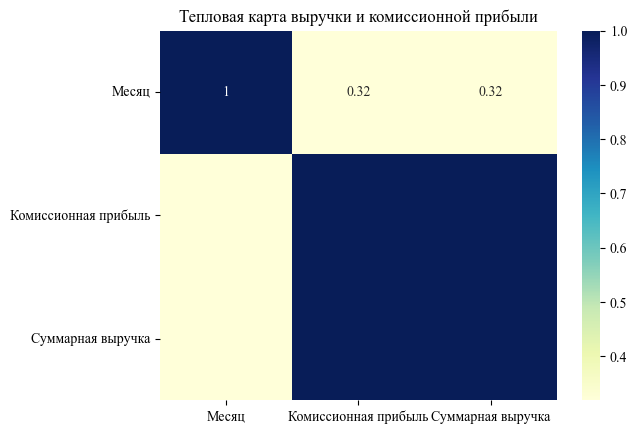

In [40]:
corr = sales_list_gr[['month_of_sale','revenue','product_price']].rename(columns={'month_of_sale':'Месяц', 'revenue':'Комиссионная прибыль','product_price':'Суммарная выручка'}).corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.title('Тепловая карта выручки и комиссионной прибыли')
plt.show()

### Задание 3.2

In [166]:
store['store_close_date'] = pd.to_datetime(store['store_close_date'] )
store = store.replace({pd.NaT: None})
store['closed'] = store['store_close_date'].apply(lambda x: 1 if x != None else 0)
f_cond = list(store[store['closed'] == 1]['store_id'])
sales_list['is_closed'] = sales_list['store_id'].apply(lambda x: 1 if x in f_cond else 0)
sales_list['month_year'] = sales_list.apply(lambda row: (row['year_of_sale'] - 2022) * 12 + row['month_of_sale'], axis=1)
df = sales_list[sales_list['is_closed'] == 0]
def plot_distribution(product_id,year,store_id):
    if year == 'Все время':
        filtered_data = df[(df['product_id'] == product_id) & (df['store_id'] == store_id)]
        if len(filtered_data) == 0:
            return 'No data found'
        grouped_data = filtered_data.groupby('month_year')['count'].sum()
    else:
        year = int(year)
        filtered_data = df[(df['product_id'] == product_id) & (df['year_of_sale'] == year) & (df['store_id'] == store_id)]
        if len(filtered_data) == 0:
            return 'No data found'
        grouped_data = filtered_data.groupby('month_of_sale')['count'].sum()
    plt.figure(figsize=(10, 6))
    grouped_data.plot(kind='bar')
    plt.grid()
    plt.xlabel('Месяц продажи')
    plt.ylabel('Количество')
    #plt.set_xticklabels(months, rotation=45)
    plt.title(f'Распределение количества продаж для магазина {store_id}, ID {product_id} за {year}')
    plt.show()

product_id_input = widgets.IntText(description='Product ID:', value=1)
year_dropdown = widgets.Dropdown(options=['Все время'] + list(df['year_of_sale'].unique()), value=list(['Все время'] + list(df['year_of_sale'].unique()))[0], description='Год:')
store_dropdown = widgets.Dropdown(options=sorted(list(df['store_id'].unique())), value=df['store_id'].unique()[0], description='Магазин:')
def update_plot(product_id, year,store_id): 
    plot_distribution(product_id, year,store_id) 


interactive_plot = interactive(update_plot, product_id=product_id_input, year=year_dropdown,store_id=store_dropdown) 
widgets_container = widgets.VBox([interactive_plot]) 
display(widgets_container)

In [ ]:
''' В последующем виджет можно улучшить на основе Big Data - добавить нейросеть из scikit learn, которая предскажет спрос на основе предыдущих месяцев 
(на данный момент данных мало, а потому точность нейросети будет мала, поэтому компенсирую статистическим расчетом )'''

### Виджет с чуть прикрученным функционалом

Ниже представлена версия виджета с прикрученными показателями и экспоненциальной интерполяцией (толку от нее, наверное, мало, но и нейросеть на таких данных результата с хорошей точностью не даст

In [191]:
df = sales_list[sales_list['is_closed'] == 0]

def plot_distribution(product_id, year, store_id):
    if year == 'Все время':
        filtered_data = df[(df['product_id'] == product_id) & (df['store_id'] == store_id)]
        if len(filtered_data) == 0:
            return 'No data found'
        grouped_data = filtered_data.groupby('month_year')['count'].sum()
    else:
        year = int(year)
        filtered_data = df[(df['product_id'] == product_id) & (df['year_of_sale'] == year) & (df['store_id'] == store_id)]
        if len(filtered_data) == 0:
            return 'No data found'
        grouped_data = filtered_data.groupby('month_of_sale')['count'].sum()
    

    if len(grouped_data) >= 2:
        x = grouped_data.index
        y = grouped_data.values
        popt, pcov = curve_fit(lambda t, a, b: a * np.exp(b * t), x, y)
        next_month = grouped_data.index[-1] + 1
        next_count = popt[0] * np.exp(popt[1] * next_month)
        grouped_data[next_month] = next_count
    
    plt.figure(figsize=(10, 6))
    grouped_data.plot(kind='bar')
    plt.grid()
    plt.xlabel('Месяц продажи')
    plt.ylabel('Количество')
    plt.title(f'Распределение количества продаж для магазина {store_id}, ID {product_id} за {year}')
    plt.show()
    

    mean = np.mean(grouped_data)
    median = np.median(grouped_data)
    mode = scipy.stats.mode(grouped_data)
    std = np.std(grouped_data)
    
    print(f'Среднее значение: {mean}')
    print(f'Медиана: {median}')
    print(f'Мода: {mode[0]} (частота: {mode[1]})')
    print(f'Стандартное отклонение: {std}')
    
    if len(grouped_data) >= 2:
        next_month = grouped_data.index[-1] + 1
        next_count = popt[0] * np.exp(popt[1] * next_month)
        print(f'Прогноз покупок в следующем месяце: {next_count}')

product_id_input = widgets.IntText(description='Product ID:', value=1)
year_dropdown = widgets.Dropdown(options=['Все время'] + list(df['year_of_sale'].unique()), value=list(['Все время'] + list(df['year_of_sale'].unique()))[0], description='Год:')
store_dropdown = widgets.Dropdown(options=sorted(list(df['store_id'].unique())), value=df['store_id'].unique()[0], description='Магазин:')

def update_plot(product_id, year, store_id): 
    plot_distribution(product_id, year, store_id) 

interactive_plot = interactive(update_plot, product_id=product_id_input, year=year_dropdown, store_id=store_dropdown) 
widgets_container = widgets.VBox([interactive_plot]) 
display(widgets_container)
